In [1]:

import requests
from IPython.display import GeoJSON
import pandas as pd
import io



In [2]:
sensor_params = dict(
    sensor_type='PM2.5',
subset_layer='Post code Districts',
subset_shapes='NE1',
)

r = requests.get('http://uoweb3.ncl.ac.uk/api/v1.1/sensors/csv/',sensor_params)

sensor_info = pd.read_csv(io.StringIO(r.text), encoding="ISO-8859-1")
sensor_info

,Sensor Name,Location (WKT),Ground Height Above Sea Level,Sensor Height Above Ground,Broker Name,Third Party,Sensor Centroid Longitude,Sensor Centroid Latitude,Raw ID


In [3]:
from datetime import datetime, timedelta

api_date_string_format = "%Y%m%d%H%M%S"

current_time = datetime.now()

start_time = current_time - timedelta(days=7)

start_time = datetime(start_time.year, start_time.month, start_time.day, start_time.hour)
end_time = datetime(current_time.year, current_time.month, current_time.day, current_time.hour)

data_params = dict(
    data_variable='PM2.5',
    agg_method='median',
    agg_period='15mins',
    starttime=start_time.strftime(api_date_string_format),
    endtime=end_time.strftime(api_date_string_format) 
)

data_params.update(sensor_params)
data_params

{'data_variable': 'PM2.5',
 'agg_method': 'median',
 'agg_period': '15mins',
 'starttime': '20230226180000',
 'endtime': '20230305180000',
 'sensor_type': 'PM2.5',
 'subset_layer': 'Post code Districts',
 'subset_shapes': 'NE1'}

In [14]:
r = requests.get('http://uoweb3.ncl.ac.uk/api/v1.1/sensors/data/agg/csv/',data_params)
#data = pd.read_csv(io.StringIO(r.text), encoding_errors='ignore', sep=";")
#print(bonfire_data.head(10))
output = io.StringIO(r.text)
output.readlines()
#data.head(10)

['<!doctype html>\n',
 '<title>Site Maintenance</title>\n',
 '<style>\n',
 '  body { text-align: center; padding: 150px; }\n',
 '  h1 { font-size: 50px; }\n',
 '  body { font: 20px Helvetica, sans-serif; color: #333; }\n',
 '  article { display: block; text-align: left; width: 650px; margin: 0 auto; }\n',
 '  a { color: #dc8100; text-decoration: none; }\n',
 '  a:hover { color: #333; text-decoration: none; }\n',
 '</style>\n',
 '\n',
 '<article>\n',
 '    <h1>We&rsquo;ll be back soon!</h1>\n',
 '    <div>\n',
 '        <p>Sorry for the inconvenience but we&rsquo;re performing some maintenance at the moment. If you need to you can always <a href="mailto:#urbanobservatory@ncl.ac.uk">contact us</a>, otherwise we&rsquo;ll be back online shortly!</p>\n',
 '        <p>&mdash; The UO Team</p>\n',
 '    </div>\n',
 '  </br>\n',
 '    <img src="logo.svg" alt="Logo">\n',
 '</article>']

NameError: name 'data' is not defined

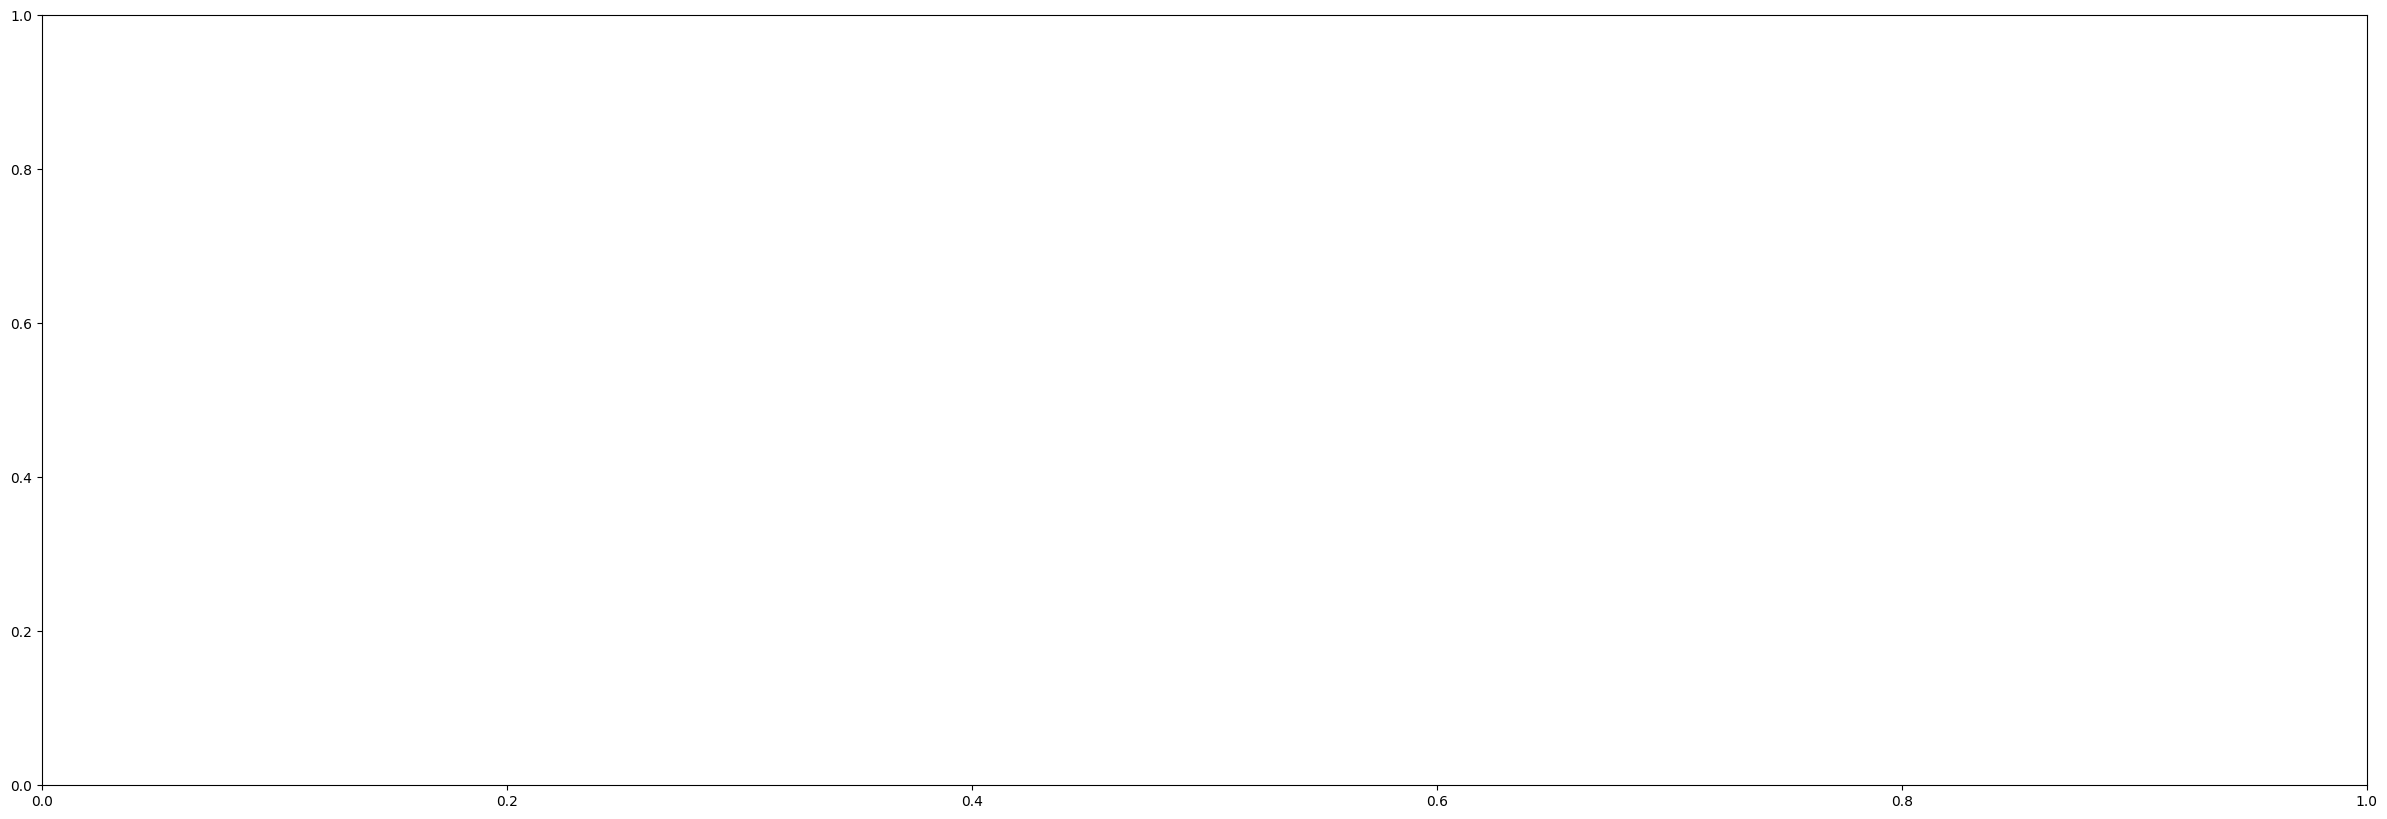

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,10))
for sensor_name,sensor_data in  data.groupby('Sensor Name'):
    
    datetimes = pd.to_datetime(sensor_data['Timestamp'])
    plt.plot(datetimes,sensor_data['Value'],label=sensor_name)

plt.legend()


In [24]:

from IPython.display import display, Javascript, HTML
import json
Javascript(filename='mapSpike.js')

<IPython.core.display.Javascript object>

In [22]:
%%javascript
require.config({
    paths: {
        d3: 'https://d3js.org/d3.v5.min'
    }
});

<IPython.core.display.Javascript object>

In [35]:
population = [5, 10, 20, 40, 50, 30, 10, 20, 40, 10, 5]
Javascript("""
(function(element){
    require(['mapSpike'], function(SpikeMap) {
        chart = SpikeMap(population, {
  value: ([population]) => +population,
  position([, stateid, countyid]) {
    const county = countymap.get(stateid + countyid);
    return county && centroid(county);
  },
  title([population, stateid, countyid]) {
    const state = statemap.get(stateid);
    const county = countymap.get(stateid + countyid);
    return `${county?.properties.name}, ${state?.properties.name}\n${(+population).toLocaleString("en")}`;
  },
  features: nation,
  borders: statemesh,
  width: 975,
  height: 610
})
    });
})(element);
""" % json.dumps(population))

TypeError: not all arguments converted during string formatting

In [21]:
%%javascript
(function(element) {
    require(['d3'], function(d3) {   
        var data = [1, 2, 4, 8, 16, 8, 4, 2, 1]

        var svg = d3.select(element.get(0)).append('svg')
            .attr('width', 400)
            .attr('height', 200);
        svg.selectAll('circle')
            .data(data)
            .enter()
            .append('circle')
            .attr("cx", function(d, i) {return 40 * (i + 1);})
            .attr("cy", function(d, i) {return 100 + 30 * (i % 3 - 1);})
            .style("fill", "#1570a4")
            .transition().duration(2000)
            .attr("r", function(d) {return 2*d;})
        ;
    })
})(element);

<IPython.core.display.Javascript object>